# Identificar fronteras no lineales

In [23]:
from sklearn.datasets.samples_generator import make_circles, make_blobs

In [2]:
X, Y = make_circles(100,factor=.1,noise=.1)

In [3]:
import matplotlib.pyplot as plt
import numpy as np

In [8]:
from sklearn.svm import SVC

In [30]:
def plot_svc(model, ax=None, plot_support=True):
    """Plot de la funcion de decisión para una clasificación en 2D con SVC"""
    if ax is None:
        ax = plt.gca() # crea un plot de matplotlib
    xlim, ylim = ax.get_xlim(), ax.get_ylim() # obtiene los limites
    ## Generamos parrilla de ptos para evaluar el modelo
    # Genera 30 pts ordenados desde lim inf a lim supe
    xx = np.linspace(xlim[0],xlim[1],30)
    yy = np.linspace(ylim[0],ylim[1],30)
    Y, X = np.meshgrid(xx,yy) # matriz 30 x 30 para X e Y
    
    xy = np.vstack([X.ravel(),Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    ## Representamos las fronteras y los márgenes del SVC
    ax.contour(X,Y,P,colors="k",levels=[-1,0,1],alpha=.5,linestyles=["--","-","--"])
    
    #print(model.support_vectors_)
    if plot_support:
        ax.scatter(model.support_vectors_[:,0],
                  model.support_vectors_[:,1],
                  s=300,linewidth=1,facecolors="none") # black
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

In [5]:
def plot_svm(N=10,ax=None):
    X, Y = make_blobs(n_samples=200,centers=2,random_state=0,cluster_std=.6)
    X = X[:N]
    Y = Y[:N]
    model = SVC(kernel="linear",C=1E10)
    model.fit(X,Y)
    
    ax=ax or plt.gca()
    ax.scatter(X[:,0],X[:,1],c=Y,s=50,cmap="autumn")
    ax.set_xlim(-1,4)
    ax.set_ylim(-1,6)
    plot_svc(model,ax)

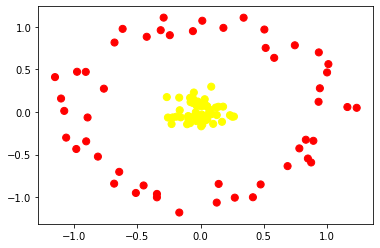

In [6]:
plt.scatter(X[:,0],X[:,1],c=Y,s=50,cmap="autumn")

[[-0.31587806  0.95906864]
 [-0.34584786 -0.96218508]
 [-1.06461084 -0.30156884]
 [-0.1689044  -1.18053027]
 [ 0.94434631  0.27755461]
 [ 0.14282929 -0.84479171]
 [ 0.58272865  0.63461157]
 [ 0.01333035  1.06988868]
 [ 0.50484106  0.96685001]
 [-0.90936572  0.469907  ]
 [ 0.51512077  0.75100411]
 [-0.51268407 -0.95081224]
 [-0.34599174 -1.00225623]
 [ 0.84946917 -0.54675489]
 [-0.90609825 -0.34504756]
 [-0.42673809  0.88172246]
 [ 0.78173014 -0.42788576]
 [-0.76597504  0.27276643]
 [ 0.89282748 -0.33894669]
 [ 1.1621472   0.05749233]
 [ 0.4753503  -0.85091527]
 [-0.81329106 -0.52441348]
 [ 0.27062107 -1.00596475]
 [ 1.01176496  0.56096841]
 [ 0.1805351   0.98641352]
 [ 0.93592737  0.69854306]
 [ 0.34047403  1.10560793]
 [ 0.41407    -1.00110794]
 [-0.98457894 -0.43495171]
 [-0.06107344  0.94809273]
 [ 0.93395691  0.11904134]
 [-0.89513468 -0.06515831]
 [-0.64448548 -0.70315639]
 [-0.45153562 -0.86292911]
 [-1.10513868  0.15728792]
 [-1.07985635  0.01207233]
 [-0.68464661 -0.84157318]
 

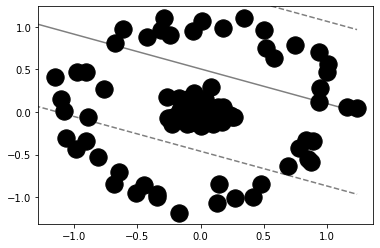

In [9]:
plt.scatter(X[:,0],X[:,1],c=Y,s=50,cmap="autumn")
plot_svc(SVC(kernel="linear").fit(X,Y),plot_support=True)

In [10]:
X**2

array([[9.97789490e-02, 9.19812651e-01],
       [2.60692201e-03, 4.51542732e-03],
       [3.91163604e-03, 4.89490739e-04],
       [2.06740260e-05, 2.85508204e-02],
       [6.95064698e-03, 2.73726991e-02],
       [1.19610745e-01, 9.25800122e-01],
       [1.13339623e+00, 9.09437646e-02],
       [1.63762383e-02, 1.33007384e-03],
       [2.88370490e-03, 5.19444469e-02],
       [2.85286953e-02, 1.39365171e+00],
       [8.91789954e-01, 7.70365619e-02],
       [2.04002048e-02, 7.13673025e-01],
       [2.84171235e-03, 6.33309032e-03],
       [7.68957580e-05, 1.09760926e-02],
       [1.98861353e-02, 3.69237119e-03],
       [3.39572677e-01, 4.02731847e-01],
       [5.32299624e-04, 1.18218700e-02],
       [1.77186179e-04, 2.25048744e-02],
       [7.76815563e-04, 1.21526822e-02],
       [1.77698320e-04, 1.14466178e+00],
       [2.54864496e-01, 9.34798942e-01],
       [6.70042421e-02, 4.31566769e-03],
       [2.71517037e-03, 3.92677844e-03],
       [9.15144376e-03, 2.87972127e-03],
       [8.269460

In [11]:
(X**2).sum(1)

array([1.01959160e+00, 7.12234933e-03, 4.40112678e-03, 2.85714944e-02,
       3.43233461e-02, 1.04541087e+00, 1.22434000e+00, 1.77063122e-02,
       5.48281518e-02, 1.42218040e+00, 9.68826516e-01, 7.34073230e-01,
       9.17480267e-03, 1.10529884e-02, 2.35785065e-02, 7.42304524e-01,
       1.23541696e-02, 2.26820606e-02, 1.29294978e-02, 1.14483948e+00,
       1.18966344e+00, 7.13199098e-02, 6.64194881e-03, 1.20311650e-02,
       1.04775860e+00, 8.29356581e-01, 1.16688888e+00, 1.67310186e-02,
       1.01985484e-01, 3.55184865e-02, 1.94982223e-02, 1.12422783e+00,
       2.95955082e-02, 1.02053877e+00, 9.40071865e-01, 7.13806821e-03,
       9.59539896e-01, 7.94188238e-01, 2.78779936e-02, 6.61119292e-01,
       4.24191416e-03, 1.42924990e-02, 9.12025767e-01, 7.30731459e-02,
       3.23080904e-02, 1.35389148e+00, 9.50014706e-01, 6.24868478e-03,
       9.36451844e-01, 1.08520085e+00, 1.46301855e-03, 5.30100003e-02,
       8.35784502e-03, 5.69406238e-02, 1.33835389e+00, 2.77420043e-02,
      

In [12]:
r = np.exp(-(X**2).sum(1))

In [13]:
from mpl_toolkits import mplot3d

In [17]:
def plot_3D(elev=30,azim=30,X=X,Y=Y,r=r):
    ax=plt.subplot(projection="3d")
    ax.scatter3D(X[:,0],X[:,1],r,c=Y,s=50,cmap="autumn")
    ax.view_init(elev=elev,azim=azim)
    
    ax.set_xlabel("x[0]")
    ax.set_ylabel("x[1]")
    ax.set_zlabel("r")

In [18]:
from ipywidgets import interact, fixed

In [20]:
interact(plot_3D, elev=[-90,-60,-30,30,60,90], azim=[-180,-120,-90,-60,-30,0,30,60,90,120,180], X = fixed(X), Y=fixed(Y), r=fixed(r))

interactive(children=(Dropdown(description='elev', index=3, options=(-90, -60, -30, 30, 60, 90), value=30), Dr…

<function __main__.plot_3D(elev=30, azim=30, X=array([[-0.31587806,  0.95906864],
       [ 0.05105803,  0.06719693],
       [ 0.06254307, -0.02212444],
       [ 0.00454687, -0.16896988],
       [-0.08337054,  0.16544697],
       [-0.34584786, -0.96218508],
       [-1.06461084, -0.30156884],
       [ 0.12796968, -0.03647018],
       [-0.05370014,  0.22791324],
       [-0.1689044 , -1.18053027],
       [ 0.94434631,  0.27755461],
       [ 0.14282929, -0.84479171],
       [ 0.05330771, -0.07958072],
       [ 0.00876902, -0.10476685],
       [ 0.14101821,  0.06076488],
       [ 0.58272865,  0.63461157],
       [ 0.02307162, -0.10872842],
       [ 0.01331113, -0.15001625],
       [ 0.02787141,  0.1102392 ],
       [ 0.01333035,  1.06988868],
       [ 0.50484106,  0.96685001],
       [-0.25885178, -0.06569374],
       [ 0.0521073 ,  0.06266401],
       [-0.09566318, -0.05366303],
       [-0.90936572,  0.469907  ],
       [ 0.51512077,  0.75100411],
       [-0.51268407, -0.95081224],
       [

In [21]:
rbf = SVC(kernel="rbf",C=1E6)
rbf.fit(X,Y)

SVC(C=1000000.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

[[ 0.14282929 -0.84479171]
 [ 0.58272865  0.63461157]
 [-0.76597504  0.27276643]
 [-0.64448548 -0.70315639]
 [ 0.83328714 -0.32628824]
 [-0.24381155  0.90052833]
 [-0.26774907  0.17405723]
 [ 0.26382451 -0.05397903]]


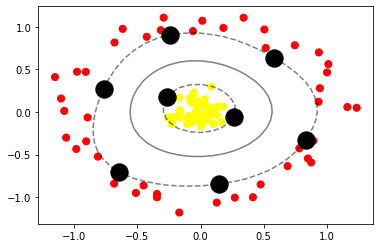

In [22]:
plt.scatter(X[:,0],X[:,1],c=Y,s=50,cmap="autumn")
plot_svc(rbf)
plt.scatter(rbf.support_vectors_[:,0],rbf.support_vectors_[:,1],s=300,lw=1,facecolors="none")

## Ajustar los params de SVM

In [24]:
X, Y = make_blobs(n_samples=100,centers=2,random_state=0,cluster_std=1.2)

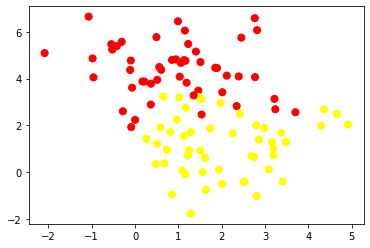

In [25]:
plt.scatter(X[:,0],X[:,1],c=Y,s=50,cmap="autumn")

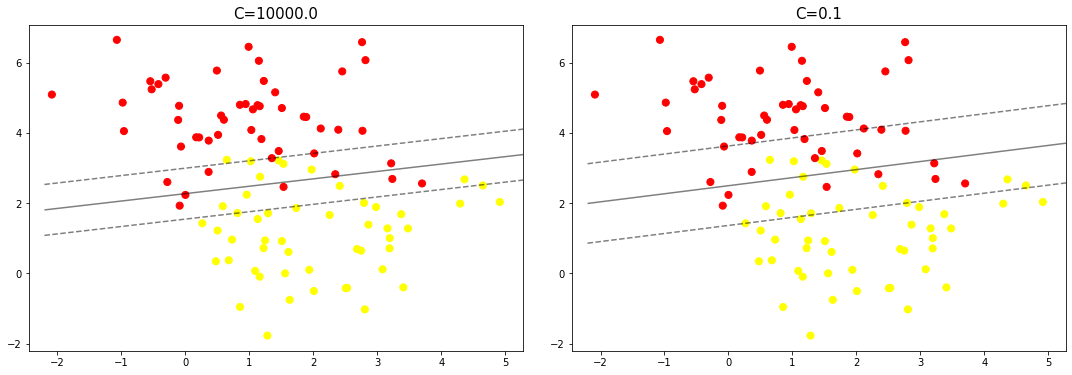

In [33]:
fig, ax = plt.subplots(1,2,figsize=(16,6))
fig.subplots_adjust(left=0.05,right=.95,wspace=.1)

for ax_i, C in zip(ax, [1E4, .1]):
    model = SVC(kernel="linear",C=C)
    model.fit(X,Y)
    ax_i.scatter(X[:,0],X[:,1],c=Y,s=50,cmap="autumn")
    plot_svc(model, ax_i)
    ax_i.set_title("C={0:.1f}".format(C),size=15)